In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

In [ ]:
df_2024 = pd.read_csv("../data/play_by_play_2024.csv", low_memory=False)
df_2023 = pd.read_csv("../data/play_by_play_2023.csv", low_memory=False)

# Get the teams in the NFL
teams = df_2024['posteam'].dropna().unique()

In [8]:
# Team records ~ 2024
record_2024 = {}

# Iterate through teams
for team in teams:
    record_2024[team] = [0, 0, 0] # [win, loss, tie]

    weeks_played = df_2024[df_2024['posteam'] == team].week.unique()

    for week in weeks_played:
        # Check if team is home or away team and get the scores of both
        home_team = df_2024[(df_2024['posteam'] == team) & (df_2024['week'] == week)]['home_team'].unique()
        away_team = df_2024[(df_2024['posteam'] == team) & (df_2024['week'] == week)]['away_team'].unique()
        home_score = df_2024[(df_2024['posteam'] == team) & (df_2024['week'] == week)]['home_score'].unique()
        away_score = df_2024[(df_2024['posteam'] == team) & (df_2024['week'] == week)]['away_score'].unique()

        if (home_team == team and home_score > away_score) or (away_team == team and away_score > home_score):
            record_2024[team][0] += 1 # Win
        elif (home_team == team and home_score < away_score) or (away_team == team and home_score > away_score):
            record_2024[team][1] += 1 # Loss
        else:
            record_2024[team][2] += 1 # Tie

In [9]:
# Team records ~ 2023
record_2023 = {}

# Iterate through teams
for team in teams:
    record_2023[team] = [0, 0, 0] # [win, loss, tie]

    weeks_played = df_2023[df_2023['posteam'] == team].week.unique()
    
    for week in weeks_played:
        # Check if team is home or away team and get the scores of both
        home_team = df_2023[(df_2023['posteam'] == team) & (df_2023['week'] == week)]['home_team'].unique()
        away_team = df_2023[(df_2023['posteam'] == team) & (df_2023['week'] == week)]['away_team'].unique()
        home_score = df_2023[(df_2023['posteam'] == team) & (df_2023['week'] == week)]['home_score'].unique()
        away_score = df_2023[(df_2023['posteam'] == team) & (df_2023['week'] == week)]['away_score'].unique()

        if (home_team == team and home_score > away_score) or (away_team == team and away_score > home_score):
            record_2023[team][0] += 1 # Win
        elif (home_team == team and home_score < away_score) or (away_team == team and home_score > away_score):
            record_2023[team][1] += 1 # Loss
        else:
            record_2023[team][2] += 1 # Tie

In [5]:
# Early down eff (1st down > 3 second down > 50%) ~ 2024

# We only care about pass or run plays no special team plays
valid_plays = ['pass', 'run'] 

team_early_down_2024 = {}

# Create dict structure for each team
for team in teams:
    team_early_down_2024[team] = [0, 0, 0, 0] # [1st down eff plays, 2nd down eff plays, tot 1, tot 2]

for team in teams:
    team_df = df_2024[df_2024['posteam'] == team]

    for _, play in team_df.iterrows():
        # Check if it is a valid play 
        if play['play_type'] in valid_plays:
            if play['down'] == 1:
                team_early_down_2024[team][2] += 1
                if play['yards_gained'] >= 3:
                    team_early_down_2024[team][0] += 1
            if play['down'] == 2:
                team_early_down_2024[team][3] += 1

                # Calculate 50% of the yards to gain
                togo = play['ydstogo']
                half_togo = togo/2 
                
                if play['yards_gained'] > half_togo:
                    team_early_down_2024[team][1] += 1

team_early_down_efficiency_2024 = {}

# Convert these metrics to efficiency percentages
for team in teams:
    team_early_down_efficiency_2024[team] = [
        (team_early_down_2024[team][0]/team_early_down_2024[team][2]) * 100, 
        (team_early_down_2024[team][1]/team_early_down_2024[team][3]) * 100, 
        ((team_early_down_2024[team][0] + team_early_down_2024[team][1]) / (team_early_down_2024[team][2] + team_early_down_2024[team][3])) * 100] # [1st down eff, 2nd down eff, early down(1st & 2nd)]

print(team_early_down_efficiency_2024)


{'ARI': [62.22910216718266, 56.30252100840336, 59.71479500891266], 'BUF': [55.80645161290323, 55.74468085106383, 55.779816513761475], 'BAL': [63.61185983827493, 52.47148288973384, 58.99053627760252], 'KC': [62.5, 51.698113207547166, 57.73710482529118], 'NO': [60.12861736334405, 47.03557312252965, 54.25531914893617], 'CAR': [57.52508361204013, 43.75, 51.625239005736134], 'DAL': [56.4179104477612, 48.46153846153846, 52.94117647058824], 'CLE': [52.293577981651374, 43.18181818181818, 48.223350253807105], 'SEA': [54.0785498489426, 49.79253112033195, 52.27272727272727], 'DEN': [58.507462686567166, 45.0, 52.60504201680673], 'GB': [59.02578796561605, 55.39033457249071, 57.44336569579288], 'PHI': [60.36036036036037, 48.38709677419355, 55.24956970740104], 'IND': [55.15151515151515, 41.702127659574465, 49.557522123893804], 'HOU': [50.82872928176796, 41.81818181818181, 46.93877551020408], 'MIA': [57.3134328358209, 48.178137651821864, 53.43642611683849], 'JAX': [56.271186440677965, 49.0740740740740

In [6]:
# Early down eff (1st down > 3 second down > 50%) ~ 2023

# We only care about pass or run plays no special team plays
valid_plays = ['pass', 'run'] 

team_early_down_2023 = {}

# Create dict structure for each team
for team in teams:
    team_early_down_2023[team] = [0, 0, 0, 0] # 1st down eff plays, 2nd down eff plays, tot 1, tot 2

for team in teams:
    team_df = df_2023[df_2023['posteam'] == team]

    for _, play in team_df.iterrows():
        # Check if it is a valid play 
        if play['play_type'] in valid_plays:
            if play['down'] == 1:
                team_early_down_2023[team][2] += 1
                if play['yards_gained'] >= 3:
                    team_early_down_2023[team][0] += 1
            if play['down'] == 2:
                team_early_down_2023[team][3] += 1

                # Calculate 50% of the yards to gain
                togo = play['ydstogo']
                half_togo = togo/2 
                
                if play['yards_gained'] > half_togo:
                    team_early_down_2023[team][1] += 1

team_early_down_efficiency_2023 = {}

# Convert these metrics to efficiency percentages
for team in teams:
    team_early_down_efficiency_2023[team] = [
        (team_early_down_2023[team][0]/team_early_down_2023[team][2]) * 100, 
        (team_early_down_2023[team][1]/team_early_down_2023[team][3]) * 100, 
        ((team_early_down_2023[team][0] + team_early_down_2023[team][1]) / (team_early_down_2023[team][2] + team_early_down_2023[team][3])) * 100] # [1st down eff, 2nd down eff, early down(1st & 2nd)]


print(team_early_down_efficiency_2023)


{'ARI': [52.49457700650759, 44.57478005865102, 49.12718204488778], 'BUF': [64.36363636363637, 56.904761904761905, 61.134020618556704], 'BAL': [62.05607476635514, 53.960396039603964, 58.57294994675186], 'KC': [56.92567567567568, 53.2258064516129, 55.36062378167641], 'NO': [58.26271186440678, 50.534759358288774, 54.84633569739953], 'CAR': [55.63063063063063, 39.42857142857143, 48.48866498740554], 'DAL': [61.48007590132827, 50.12658227848101, 56.61605206073753], 'CLE': [54.054054054054056, 45.26066350710901, 50.10638297872341], 'SEA': [59.95475113122172, 48.89589905362776, 55.33596837944664], 'DEN': [57.540603248259856, 46.93251533742331, 52.97225891677675], 'GB': [61.08870967741935, 50.91383812010444, 56.655290102389074], 'PHI': [55.55555555555556, 52.35602094240838, 54.18994413407822], 'IND': [54.347826086956516, 50.13927576601671, 52.50305250305251], 'HOU': [57.28542914171657, 45.99483204134367, 52.36486486486487], 'MIA': [62.4, 50.28409090909091, 57.3943661971831], 'JAX': [55.88235294

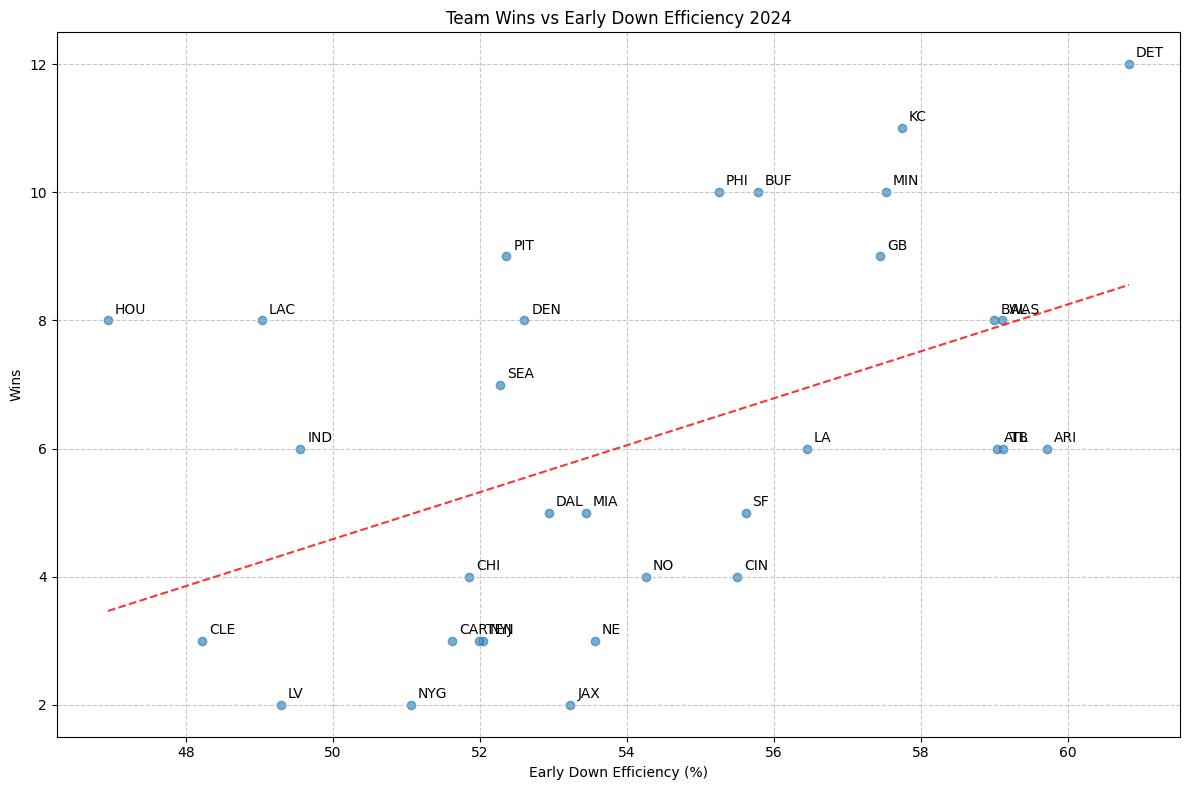

0.22131619638236938


In [ ]:
# 2024 team eff

team_eff = []
team_wins = []
team_label = []

for team in teams:
    team_eff.append(team_early_down_efficiency_2024[team][2])
    team_wins.append(record_2024[team][0])
    team_label.append(team)

# Calculate correlation and trend line for chart
correlation_matrix = np.corrcoef(team_eff, team_wins)
correlation = correlation_matrix[0,1]
r_squared = correlation ** 2

slope, intercept = np.polyfit(team_eff, team_wins, 1)

plt.figure(figsize = (12, 8))
plt.scatter(team_eff, team_wins, alpha = 0.6)

for i, team in enumerate(team_label):
    plt.annotate(team, (team_eff[i], team_wins[i]), xytext=(5, 5), textcoords='offset points')

x_range = np.array([min(team_eff), max(team_eff)])
plt.plot(x_range, slope * x_range + intercept, 'r--', alpha=0.8)

plt.xlabel('Early Down Efficiency (%)')
plt.ylabel('Wins')
plt.title('Team Wins vs Early Down Efficiency 2024')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(r_squared)

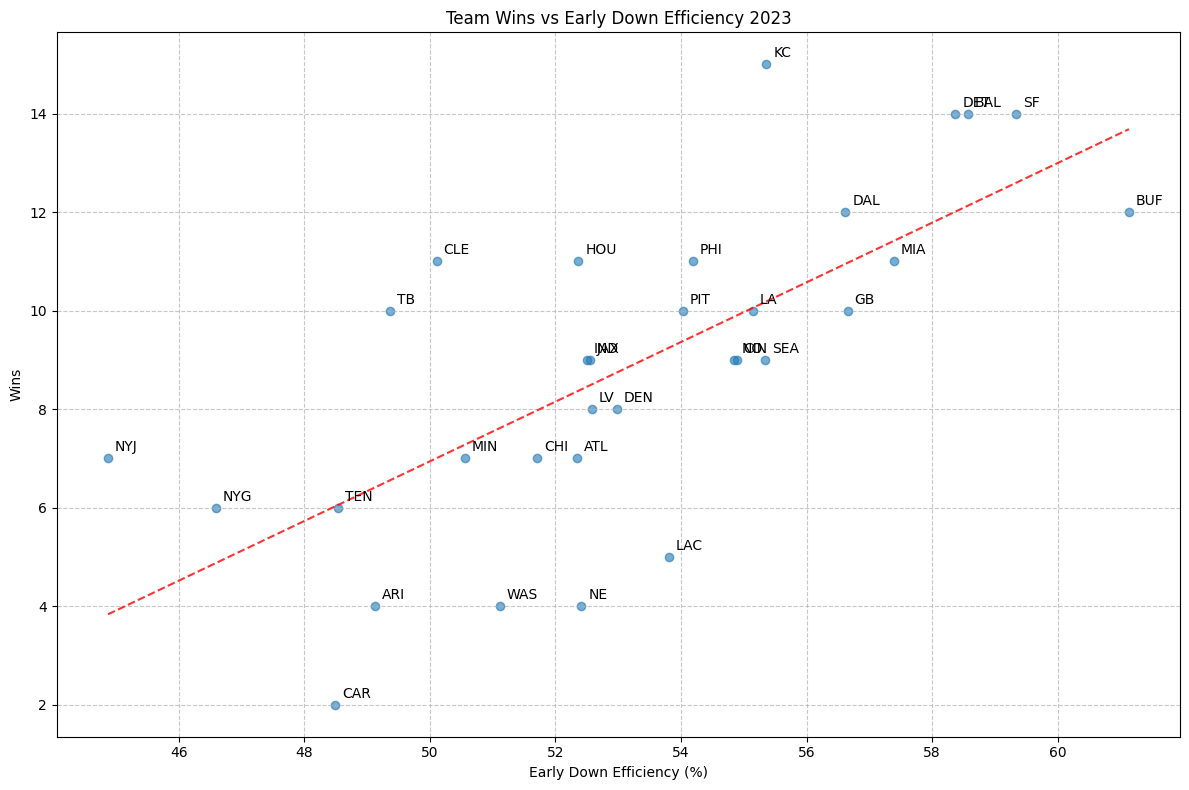

0.48875583301329967


In [21]:
# 2023 team eff

team_eff = []
team_wins = []
team_label = []

for team in teams:
    team_eff.append(team_early_down_efficiency_2023[team][2])
    team_wins.append(record_2023[team][0])
    team_label.append(team)

# Calculate correlation and trend line for chart
correlation_matrix = np.corrcoef(team_eff, team_wins)
correlation = correlation_matrix[0,1]
r_squared = correlation ** 2

slope, intercept = np.polyfit(team_eff, team_wins, 1)

plt.figure(figsize = (12, 8))
plt.scatter(team_eff, team_wins, alpha = 0.6)

for i, team in enumerate(team_label):
    plt.annotate(team, (team_eff[i], team_wins[i]), xytext=(5, 5), textcoords='offset points')

x_range = np.array([min(team_eff), max(team_eff)])
plt.plot(x_range, slope * x_range + intercept, 'r--', alpha=0.8)

plt.xlabel('Early Down Efficiency (%)')
plt.ylabel('Wins')
plt.title('Team Wins vs Early Down Efficiency 2023')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(r_squared)

In [ ]:
# Early game explosiveness -> offensive success (2024)

scores = {}
yards = {}

for team in teams:
    df = df_2024[df_2024['posteam'] == team]

    weeks = df.week.unique()
    
    for week in weeks:
        # Compare first q vs rest of game 
        quarter_one_df = df[(df.week == week) & (df.qtr == 1)]
        rest_df = df[(df.week == week) & (df.qtr != 1)]

        explosive_plays_2024 = {
            'ten_plus': sum(quarter_one_df.yards_gained >= 10),
            'twenty_plus': sum(quarter_one_df.yards_gained >= 20)
        }
            
        is_home = quarter_one_df.home_team.iloc[0] == team
        score = quarter_one_df.home_score.iloc[-1] if is_home else quarter_one_df.away_score.iloc[-1]
        yards_gained = df[df['week'] == week].yards_gained.sum()

        if score not in scores:
            scores[score] = []
        
        if yards_gained not in yards:
            yards[yards_gained] = []

        scores[score].append([explosive_plays_2024['ten_plus'], explosive_plays_2024['twenty_plus']])
        yards[yards_gained].append([explosive_plays_2024['ten_plus'], explosive_plays_2024['twenty_plus']])
    

In [18]:
# Early game explosiveness -> offensive success (2023)

scores = {}
yards = {}

for team in teams:
    df = df_2023[df_2023['posteam'] == team]

    weeks = df.week.unique()
    
    for week in weeks:
        quarter_one_df_2023 = df[(df.week == week) & (df.qtr == 1)]
        
        explosive_plays_2023 = {
            'ten_plus': sum(quarter_one_df_2023.yards_gained >= 10),
            'twenty_plus': sum(quarter_one_df_2023.yards_gained >= 20)
        }
            
        is_home = quarter_one_df_2023.home_team.iloc[0] == team
        score = quarter_one_df_2023.home_score.iloc[-1] if is_home else quarter_one_df_2023.away_score.iloc[-1]
        yards_gained = df[df['week'] == week].yards_gained.sum()

        if score not in scores:
            scores[score] = []
        
        if yards_gained not in yards:
            yards[yards_gained] = []

        scores[score].append([explosive_plays_2023['ten_plus'], explosive_plays_2023['twenty_plus']])
        yards[yards_gained].append([explosive_plays_2023['ten_plus'], explosive_plays_2023['twenty_plus']])
    

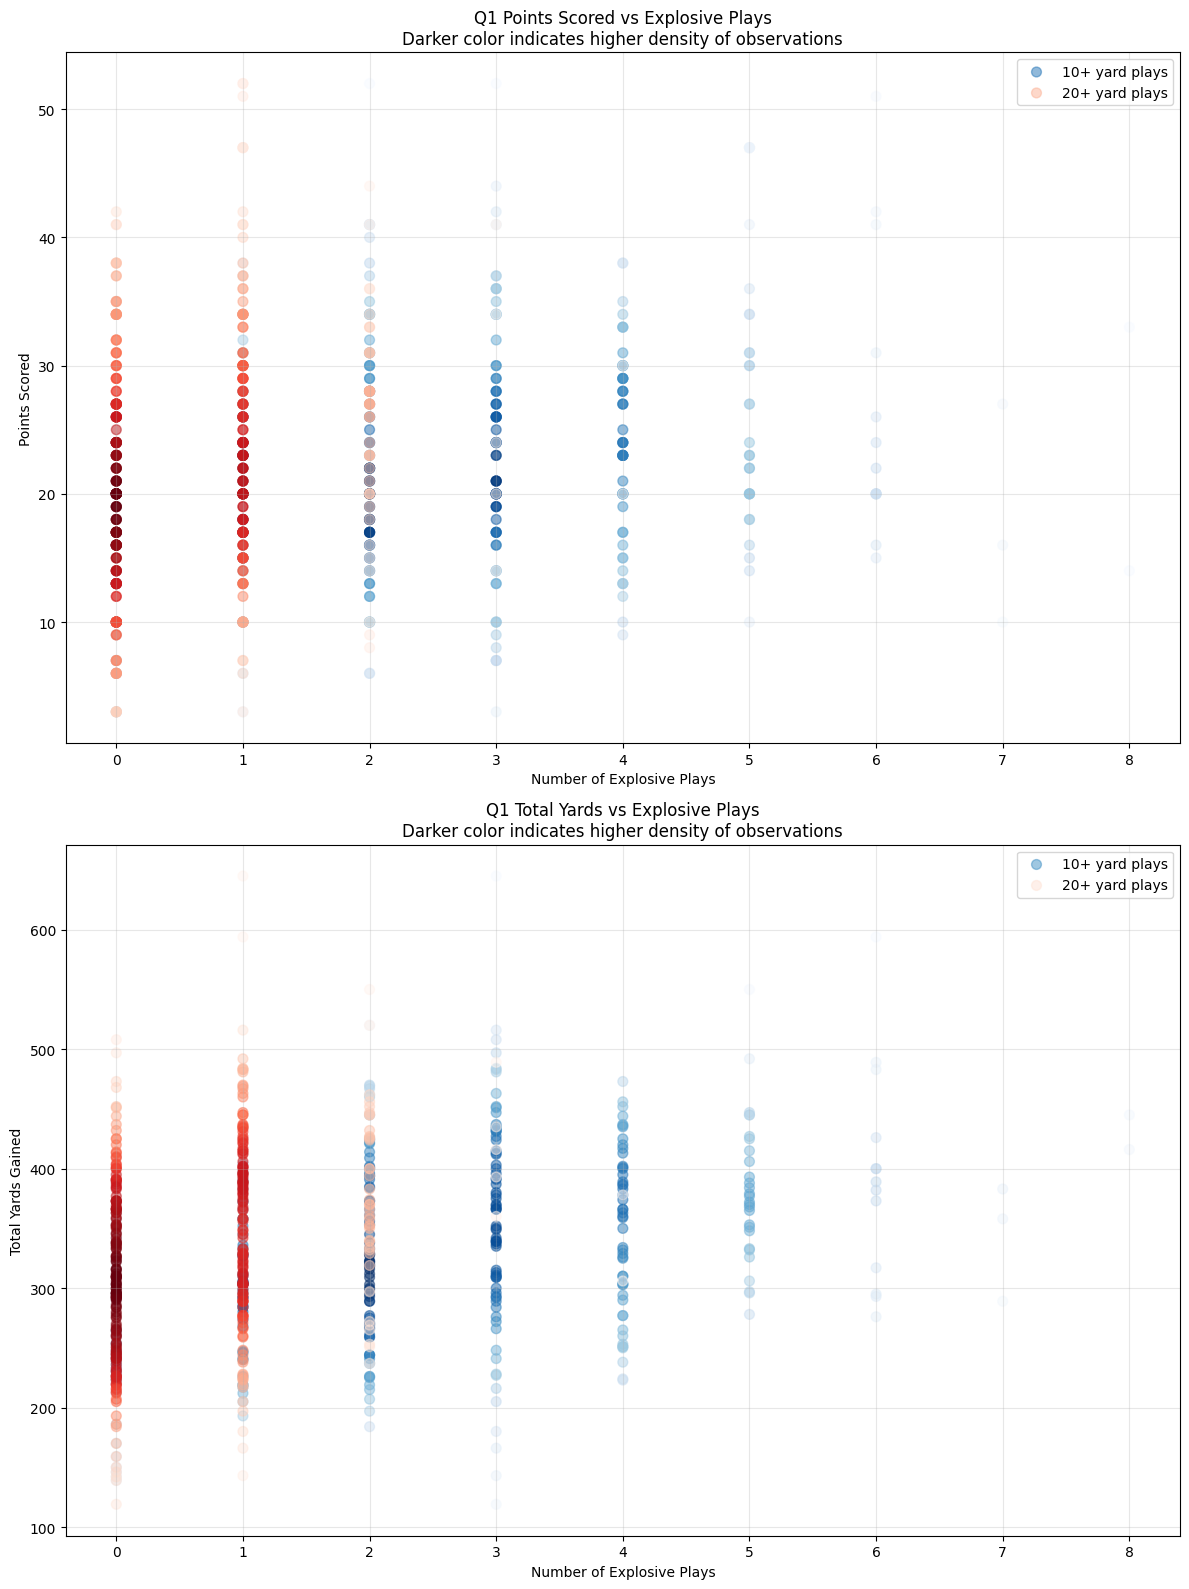

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def create_explosive_plays_plots(scores, yards):
    # Create a figure with two subplots stacked vertically
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
    
    # Plot 1: Explosive Plays vs Scores
    x_10plus = []  # Will store number of 10+ yard plays
    x_20plus = []  # Will store number of 20+ yard plays
    y_scores = []  # Will store points for each observation
    
    for score, plays in scores.items():
        plays_array = np.array(plays)
        # For each score, add the number of 10+ yard plays and the score
        x_10plus.extend(plays_array[:, 0])
        # For each score, add the number of 20+ yard plays and the score
        x_20plus.extend(plays_array[:, 1])
        # Add the score for each observation
        y_scores.extend([score] * len(plays_array))
    
    # Convert to numpy arrays
    x_10plus = np.array(x_10plus)
    x_20plus = np.array(x_20plus)
    y_scores = np.array(y_scores)
    
    # Calculate the point density for both types of plays
    xy_10plus = np.vstack([x_10plus, y_scores])
    z_10plus = gaussian_kde(xy_10plus)(xy_10plus)
    
    xy_20plus = np.vstack([x_20plus, y_scores])
    z_20plus = gaussian_kde(xy_20plus)(xy_20plus)
    
    # Plot with both scatter and density
    scatter1_10 = ax1.scatter(x_10plus, y_scores, c=z_10plus, s=50, alpha=0.5, 
                            cmap='Blues', label='10+ yard plays')
    scatter1_20 = ax1.scatter(x_20plus, y_scores, c=z_20plus, s=50, alpha=0.5, 
                            cmap='Reds', label='20+ yard plays')
    
    ax1.set_ylabel('Points Scored')
    ax1.set_xlabel('Number of Explosive Plays')
    ax1.set_title('Q1 Points Scored vs Explosive Plays\nDarker color indicates higher density of observations')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Explosive Plays vs Total Yards
    x_yards_10plus = []
    x_yards_20plus = []
    y_total_yards = []
    
    for total_yards, plays in yards.items():
        plays_array = np.array(plays)
        x_yards_10plus.extend(plays_array[:, 0])
        x_yards_20plus.extend(plays_array[:, 1])
        y_total_yards.extend([total_yards] * len(plays_array))
    
    # Convert to numpy arrays
    x_yards_10plus = np.array(x_yards_10plus)
    x_yards_20plus = np.array(x_yards_20plus)
    y_total_yards = np.array(y_total_yards)
    
    # Calculate the point density
    xy_yards_10plus = np.vstack([x_yards_10plus, y_total_yards])
    z_yards_10plus = gaussian_kde(xy_yards_10plus)(xy_yards_10plus)
    
    xy_yards_20plus = np.vstack([x_yards_20plus, y_total_yards])
    z_yards_20plus = gaussian_kde(xy_yards_20plus)(xy_yards_20plus)
    
    # Plot with both scatter and density
    scatter2_10 = ax2.scatter(x_yards_10plus, y_total_yards, c=z_yards_10plus, s=50, 
                            alpha=0.5, cmap='Blues', label='10+ yard plays')
    scatter2_20 = ax2.scatter(x_yards_20plus, y_total_yards, c=z_yards_20plus, s=50, 
                            alpha=0.5, cmap='Reds', label='20+ yard plays')
    
    ax2.set_ylabel('Total Yards Gained')
    ax2.set_xlabel('Number of Explosive Plays')
    ax2.set_title('Q1 Total Yards vs Explosive Plays\nDarker color indicates higher density of observations')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Example usage:
fig = create_explosive_plays_plots(scores, yards)
plt.show()

In [ ]:
# Drive momentum

In [20]:
# EFF is 1st q vs 4th q

In [ ]:
df_new = df_2024.copy()
df_new['game_play_num'] = -1

for game_id in df_new.game_id.unique():
    game_plays = df_new[df_new.game_id == game_id]
    
    # Get teams in the game from first play
    first_play = game_plays.iloc[1]
    teams = [first_play['posteam'], first_play['defteam']]

    # Initialize play counters for both teams
    play_counts = {teams[0]: 0, teams[1]: 0}

    # Update play numbers for each valid play
    for idx, play in game_plays.iterrows():
        if play['posteam'] in teams and play['play_type'] in valid_plays:
            print('here') 
            current_count = play_counts[play['posteam']]
            df_new.loc[idx, 'game_play_num'] = current_count
            play_counts[play['posteam']] += 1

['ARI', 'BUF']
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
['BAL', 'KC']
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
h

In [59]:
for _, play in df_new.iterrows():
    if play['game_play_num'] == -1:
        print(play['play_type'])

nan
kickoff
extra_point
kickoff
nan
field_goal
kickoff
no_play
no_play
field_goal
kickoff
extra_point
kickoff
no_play
no_play
no_play
no_play
no_play
no_play
extra_point
kickoff
qb_kneel
nan
kickoff
extra_point
kickoff
punt
punt
extra_point
kickoff
nan
field_goal
kickoff
no_play
no_play
extra_point
kickoff
kickoff
punt
punt
no_play
field_goal
kickoff
no_play
qb_kneel
nan
nan
kickoff
no_play
no_play
extra_point
kickoff
extra_point
kickoff
punt
nan
punt
no_play
no_play
field_goal
kickoff
no_play
no_play
field_goal
kickoff
no_play
no_play
no_play
field_goal
no_play
no_play
no_play
no_play
field_goal
kickoff
qb_kneel
nan
kickoff
no_play
no_play
no_play
extra_point
kickoff
punt
no_play
punt
no_play
nan
extra_point
kickoff
extra_point
kickoff
field_goal
kickoff
no_play
no_play
no_play
punt
no_play
no_play
nan
nan
kickoff
extra_point
kickoff
no_play
field_goal
kickoff
punt
extra_point
kickoff
nan
no_play
punt
field_goal
kickoff
no_play
field_goal
kickoff
no_play
no_play
punt
extra_point
kicko

In [36]:
print(df_2024.play_type.unique())

[nan 'kickoff' 'run' 'pass' 'extra_point' 'field_goal' 'no_play'
 'qb_kneel' 'punt' 'qb_spike']
